In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from stop_dependence import *

In [15]:
data = pd.read_csv('datasets/glass.data', header=None)
del data[0]
y = data[10]
X = data.loc[:, 0:9]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('train score: {}'.format(clf.score(X_train, y_train)))
print('test score: {}'.format(clf.score(X_test, y_test)))

train score: 1.0
test score: 0.6481481481481481


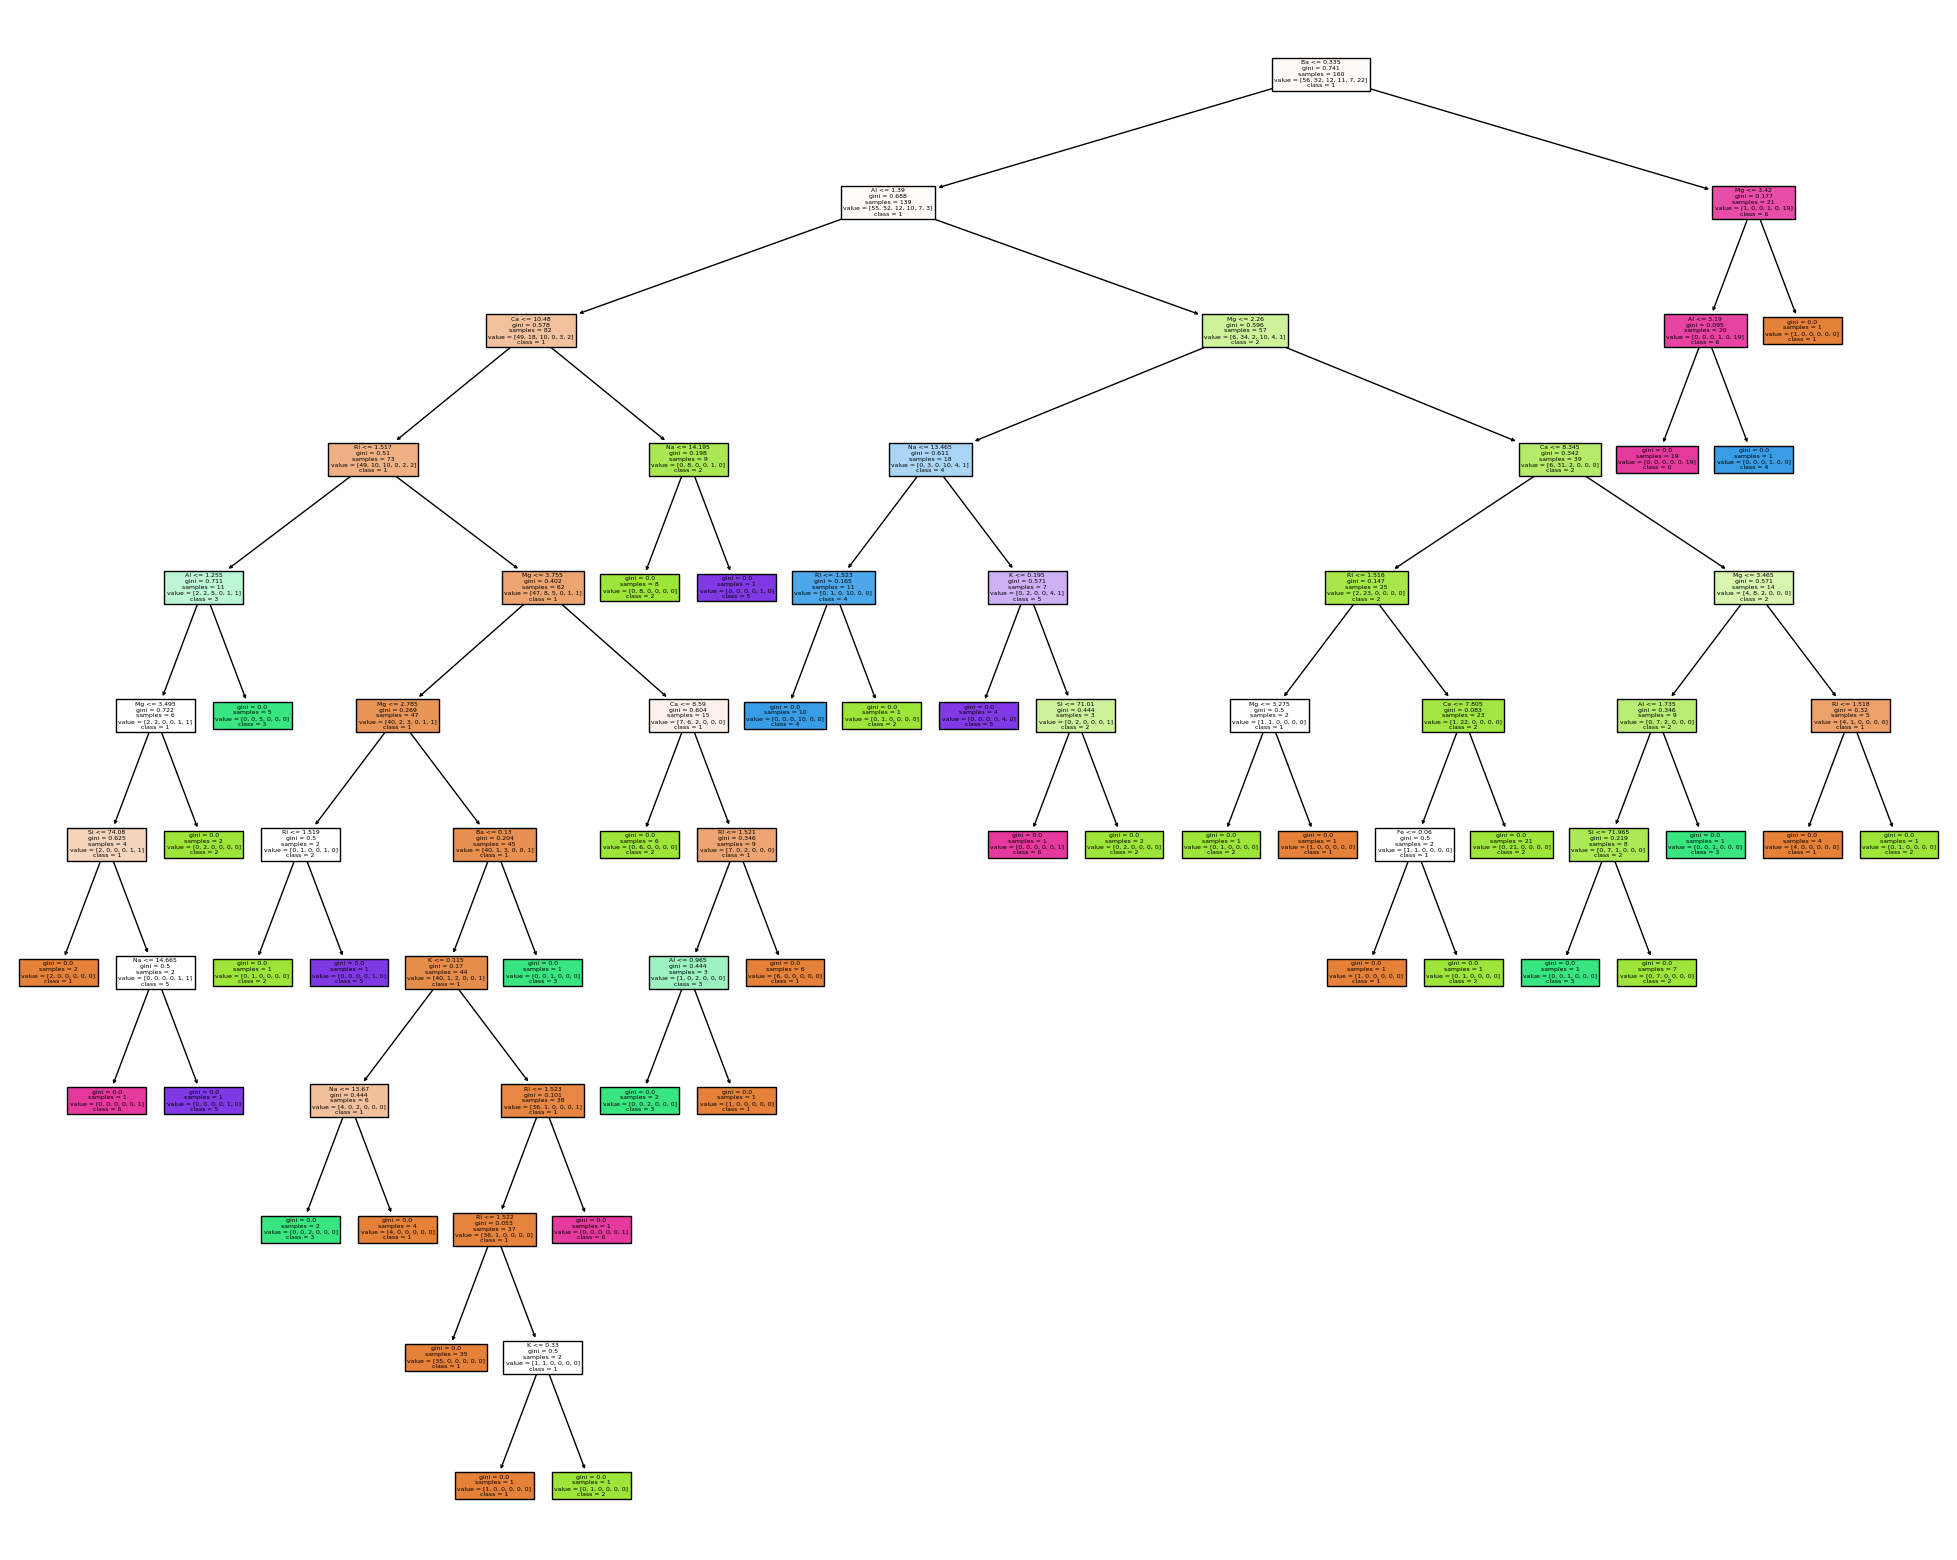

In [17]:
# Отображение дерева
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf,
feature_names=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'],
class_names=['1', '2', '3', '4', '5', '6', '7'],
filled=True)
fig.savefig('graphs/glass.pdf', dpi=1000)

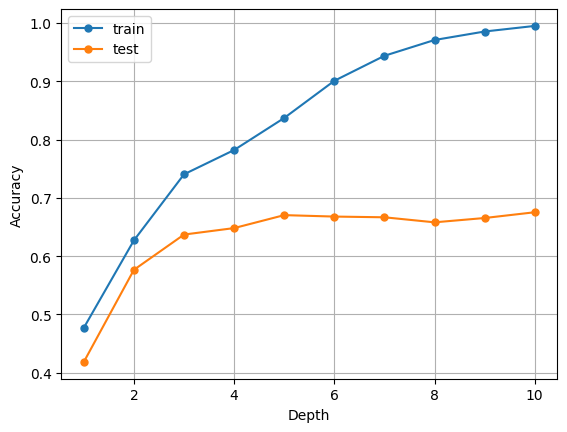

In [18]:
# Останов по высоте
plt.xlabel('Depth')
plt.ylabel('Accuracy')
depth_train_dep, depth_test_dep = depth_accuracy_dependence(X, y)
plt.plot(depth_train_dep, label='train', marker='.', markersize=10)
plt.plot(depth_test_dep, label='test', marker='.', markersize=10)
plt.legend()
plt.grid()
plt.show()

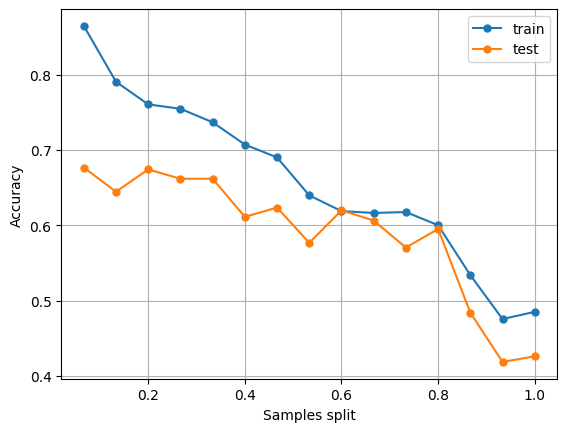

In [19]:
# Останов по числу объектов
plt.xlabel('Samples split')
plt.ylabel('Accuracy')
samples_split_train_dep, samples_split_test_dep = samples_split_accuracy_dependence(X, y)
plt.plot(samples_split_train_dep, label='train', marker='.', markersize=10)
plt.plot(samples_split_test_dep, label='test', marker='.', markersize=10)
plt.legend()
plt.grid()
plt.show()

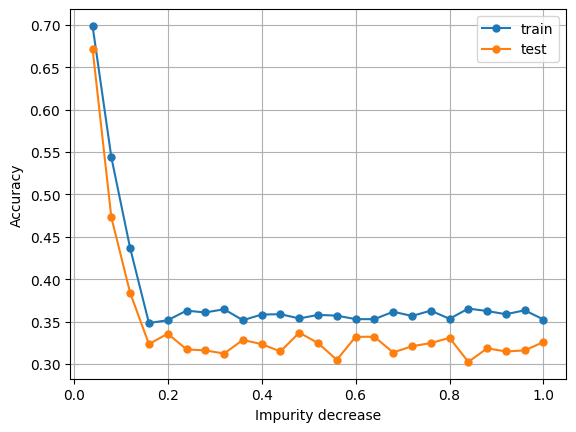

In [20]:
# Останов по проценту примеси(по ошибке классификации)
plt.xlabel('Impurity decrease')
plt.ylabel('Accuracy')
impurity_decrease_train_dep, impurity_decrease_test_dep = impurity_decrease_accuracy_dependence(X, y)
plt.plot(impurity_decrease_train_dep, label='train', marker='.', markersize=10)
plt.plot(impurity_decrease_test_dep, label='test', marker='.', markersize=10)
plt.legend()
plt.grid()
plt.show()

In [21]:
# Запуск с оптимальными параметрами
clf_impurity = DecisionTreeClassifier(max_depth=3, min_samples_split=0.15,
min_impurity_decrease=0.04)
clf_impurity.fit(X_train, y_train)
print('train score: {}'.format(clf_impurity.score(X_train, y_train)))
print('test score: {}'.format(clf_impurity.score(X_test, y_test)))
print('predict class: {}'.format(clf_impurity.predict([[1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0.1]])))

train score: 0.73125
test score: 0.6296296296296297
predict class: [2]


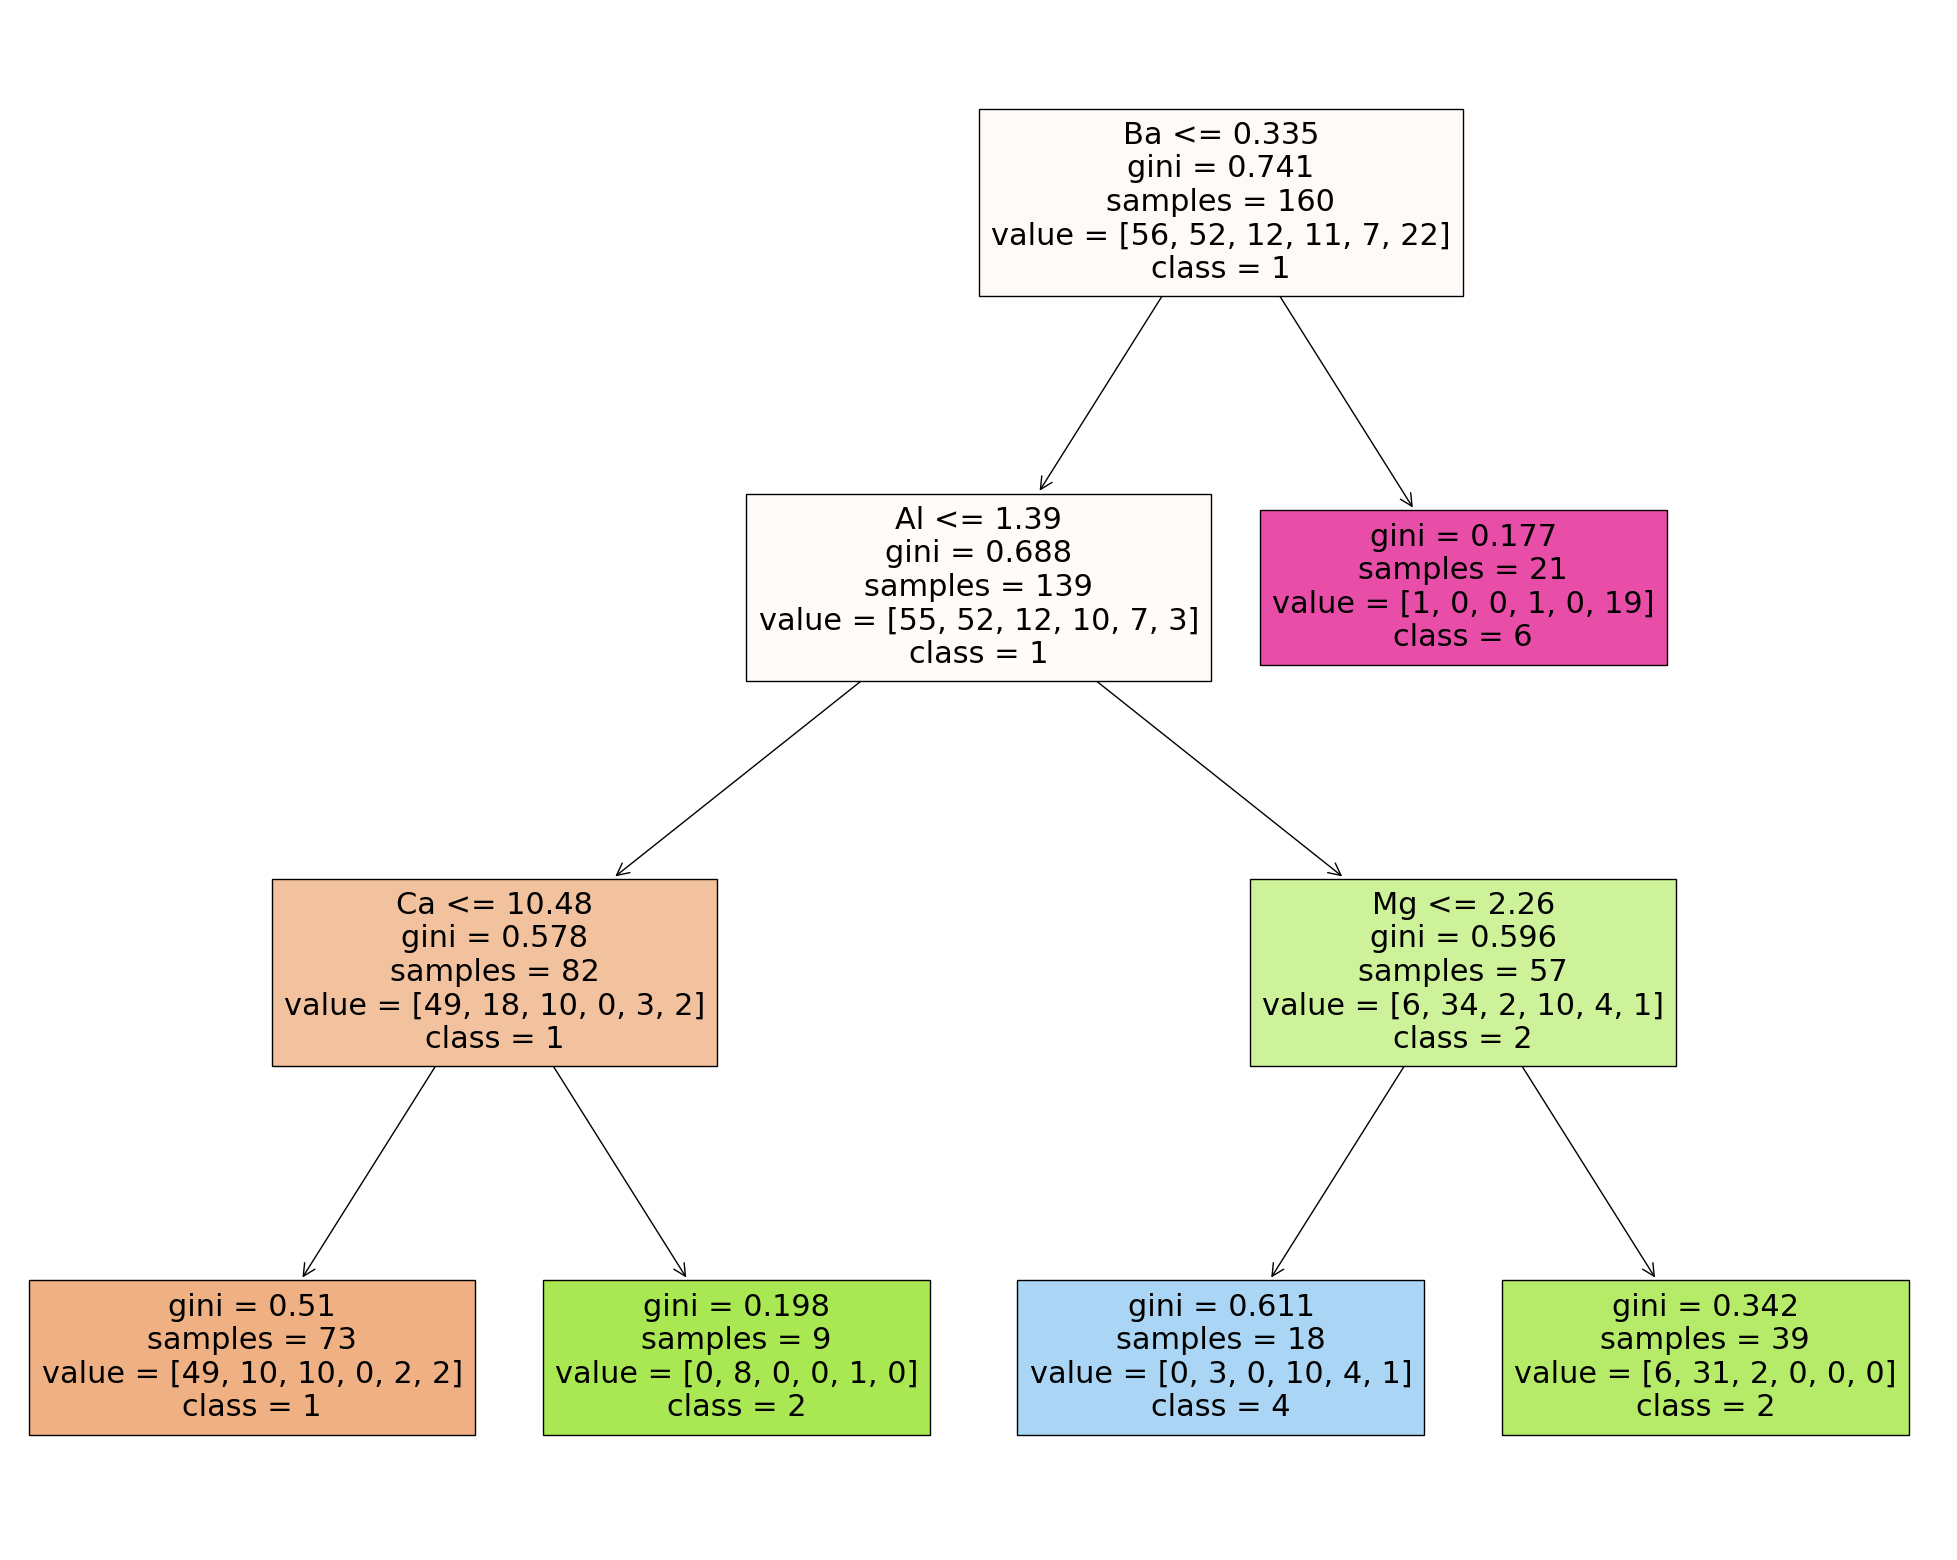

In [22]:
# Отображение дерева
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf_impurity,
feature_names=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'],
class_names=['1', '2', '3', '4', '5', '6', '7'],
filled=True)
fig.savefig('graphs/glass_improved.pdf', dpi=1000)